# Global Coffee Production Analysis

Maven Consulting Group is a multinational firm that provides strategic advice to companies across different industries. 
A potential client who happens to be a major Coffee trader, has requested an outside view on the coffee industry. They’re particularly interested in Brazil’s production relative to other nations and have shared Global Coffee Production 1990-2022.csv file which includes data of global coffee produced (in thousands of 60 kg bags) by different countries across the world.

They would like to know below information:
* Which are the Top 10 coffee producing Nations ?
* Top 5 Nations over time, any pattern that can be seen ?
* How has Brazil's share of global coffee production changed over time ?
* Brazil's performance compared to its competitors like Venezuela and Vietnam
* Composition of top 5 producers as well as rest of the countries in 2022. Where does Brazil Stand ?
* What is Brazil's share of global production in 1990 and 2022 ?

The findings should be clubbed together as a Single Figure Report and shared as an image

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "Global Coffee Production 1990-2022.csv"

coffee_production = pd.read_csv(path).T  # Transpose the table
coffee_production.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0


In [3]:
coffee_production.columns = coffee_production.iloc[0] # making columns names same as first row
coffee_production = coffee_production.drop("total_production") # dropping first row
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            33 non-null     object
 1   Bolivia (Plurinational State of)  33 non-null     object
 2   Brazil                            33 non-null     object
 3   Burundi                           33 non-null     object
 4   Ecuador                           33 non-null     object
 5   Indonesia                         33 non-null     object
 6   Madagascar                        33 non-null     object
 7   Malawi                            33 non-null     object
 8   Papua New Guinea                  33 non-null     object
 9   Paraguay                          33 non-null     object
 10  Peru                              33 non-null     object
 11  Rwanda                            33 non-null     object
 12  Timor-Leste             

## Top 10 Coffee producing Nations

In [5]:
top10_producers = coffee_production.sum(axis = 0).sort_values(ascending= False).iloc[:10]

top10_producers

total_production
Brazil       1428466.46059
Viet Nam       557490.5739
Colombia       401728.2548
Indonesia     285533.33674
Ethiopia     172029.356092
India        154273.771815
Mexico       144025.945752
Honduras      135085.04083
Guatemala    128953.761681
Uganda       112004.109297
dtype: object

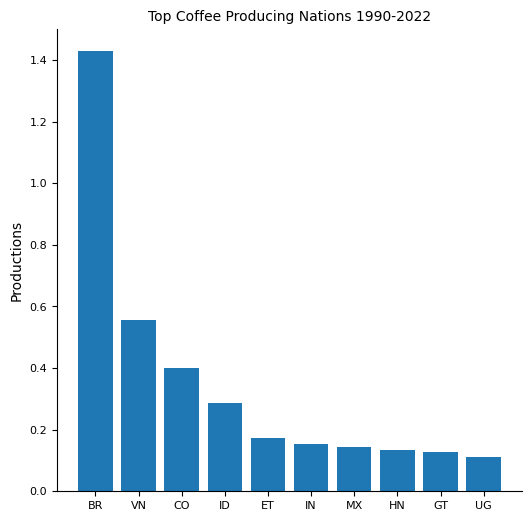

In [6]:
# creating a bar chart for the top 10 producing Nations
fig, ax = plt.subplots(figsize=(6,6))

labels = ['BR', 'VN', 'CO', 'ID', 'ET', 'IN', 'MX', 'HN', 'GT', 'UG']
ax.bar(top10_producers.index,
       top10_producers.values/1000000,
      )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

positions = list(range(10))
ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.set_ylabel('Productions', fontsize = 10)
ax.set_title('Top Coffee Producing Nations 1990-2022', fontsize=10);
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

## Top 5 producing Nations over time 

In [7]:
coffee_production.index.dtype

dtype('O')

In [8]:
# converting the datatype of index to datetime
coffee_production.index = coffee_production.index.astype('datetime64[ns]')

In [9]:
top5 = coffee_production[top10_producers.index[:5]] # slicing top 5 countries from top10_producers dataframe

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


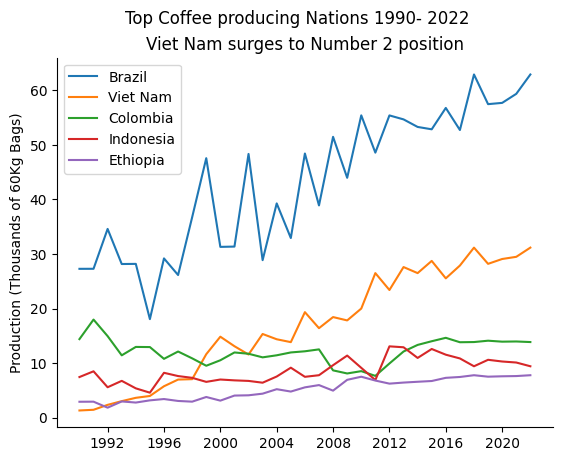

In [10]:
# creating a line chart to display production over time for top5 nations
fig, ax = plt.subplots()

ax.plot(top5.index, top5['Brazil']/1000, label = "Brazil")
ax.plot(top5.index, top5['Viet Nam']/1000, label = "Viet Nam")
ax.plot(top5.index, top5['Colombia']/1000, label = "Colombia")
ax.plot(top5.index, top5['Indonesia']/1000, label = "Indonesia")
ax.plot(top5.index, top5['Ethiopia']/1000, label = "Ethiopia")

ax.set_ylabel("Production (Thousands of 60Kg Bags)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
fig.suptitle('Top Coffee producing Nations 1990- 2022')
ax.set_title('Viet Nam surges to Number 2 position') # Since Vietnam is the next highest coffee producing nation
plt.show()

## How has Brazil's share of global coffee production changed over time ?

In [11]:
# to display brazil's share, let's create a stacked area chart of brazil vs rest of the countries
# creating a df that outputs all rows for brazil and sum of rest of the countries 
brazil_vs_others = (coffee_production.assign(rest_of_world = coffee_production
                          .drop('Brazil', axis=1).sum(axis = 1)) # axis=1 since we are summing up values across a single row for each date
                    .loc[:, ['Brazil', 'rest_of_world']]
                   .astype({'Brazil': 'float64'}))

In [12]:
brazil_vs_others

total_production,Brazil,rest_of_world
1990-01-01,27285.62860,65944.431000
1991-01-01,27293.49340,73973.191000
1992-01-01,34603.35420,63922.545000
1993-01-01,28166.97860,63597.643000
1994-01-01,28192.04700,65121.147000
1995-01-01,18060.20220,69257.256000
1996-01-01,29196.74300,74105.853000
1997-01-01,26148.00400,73713.195000
1998-01-01,36760.85330,72131.359800
1999-01-01,47577.80650,83805.990200


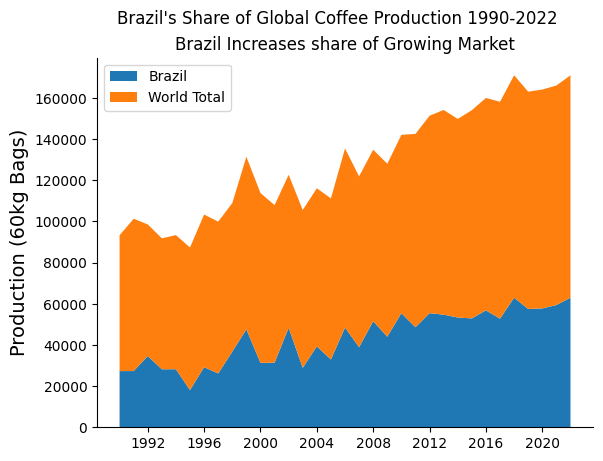

In [13]:
# creating stacked area chart
fig, ax = plt.subplots()

ax.stackplot(
       brazil_vs_others.index,
       brazil_vs_others['Brazil'],
       brazil_vs_others['rest_of_world'],
       labels = ['Brazil', 'World Total']
       )

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2022")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left");

## Compare Brazil with its competitors in terms of production

Text(0.5, 1.0, 'Venezuela Production Declines as Brazil Expands')

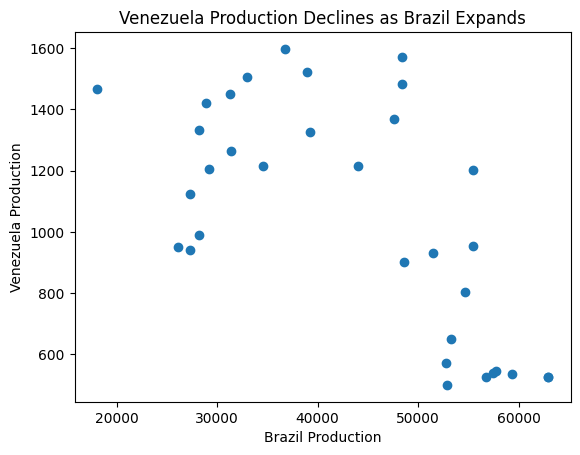

In [14]:
# comparing Brazil's production with Venezuela
fig, ax = plt.subplots()
ax.scatter(coffee_production['Brazil'],
          coffee_production['Venezuela'],
          )
ax.set_xlabel('Brazil Production')
ax.set_ylabel('Venezuela Production')
ax.set_title('Venezuela Production Declines as Brazil Expands')

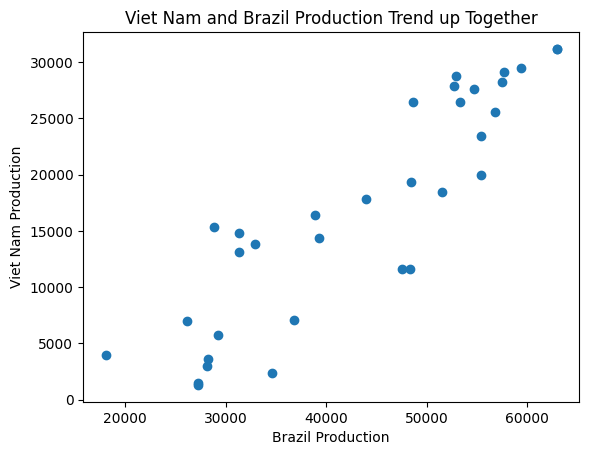

In [15]:
# comparing Brazil's production with Vietnam
fig, ax = plt.subplots()
ax.scatter(coffee_production['Brazil'],
          coffee_production['Viet Nam'],
          )
ax.set_xlabel('Brazil Production')
ax.set_ylabel('Viet Nam Production')
ax.set_title('Viet Nam and Brazil Production Trend up Together')
plt.show()

## What is status of top 5 producers as well as rest of the countries in 2022

In [16]:
# adding a new column to calculate the total production of rest of the countries excluding top 5
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)

coffee_production

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Rest of World
1990-01-01,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0,39887.309000
1991-01-01,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0,43137.086000
1992-01-01,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0,39240.571000
1993-01-01,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0,39444.713000
1994-01-01,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0,40394.930000
1995-01-01,62.109,142.485,18060.2022,433.98,1888.233,4573.429,785.009,91.235,1002.363,22.843,...,43.768,35.595,1317.226,84.401,17.629,3243.584,1466.554,3970.086,0.0,44610.401000
1996-01-01,70.925,124.579,29196.743,400.969,1992.914,8220.584,849.008,48.65,1089.348,25.563,...,40.91,36.999,1403.581,290.586,18.188,3418.724,1206.162,5752.481,0.0,45946.496000
1997-01-01,64.33,140.719,26148.004,249.785,1190.663,7620.778,623.804,60.82,1074.021,23.379,...,49.679,57.584,1293.076,221.078,19.392,3439.868,951.285,6978.942,0.0,43934.115000
1998-01-01,85.344,137.985,36760.8533,491.992,1205.968,7295.955,991.799,64.321,1352.149,58.347,...,26.882,45.738,915.986,321.486,17.018,3385.839,1597.279,7051.722,68.7007,43987.995800
1999-01-01,54.939,157.702,47577.8065,350.55,1197.6832,6557.0662,427.317,59.0,1387.0519,20.241,...,59.02,31.716,1272.8378,262.808,16.89,2862.447,1366.835,11630.9138,60.579,52321.713300


In [17]:
coffee_production_2022 = coffee_production.loc['2022', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]
coffee_production_2022

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia,Rest of World
2022-01-01,62924.8836,31174.0742,13857.962,9417.5942,7776.2234,45786.0003


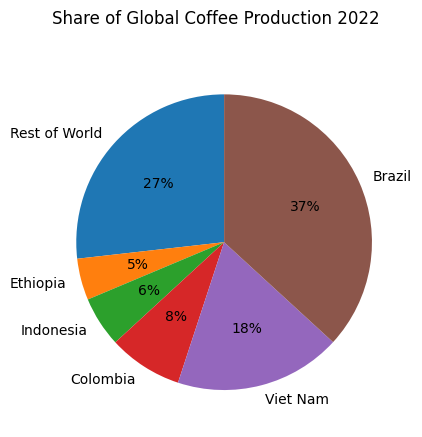

In [18]:
# creating a pie chart to display share of each party
fig, ax = plt.subplots()

ax.pie(coffee_production_2022.iloc[0][::-1], # slicing trick to reverse the order of values (here desc to ascen)
       autopct="%.0f%%",
     labels=list(coffee_production_2022.columns[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2022"); 

## Display Brazil's share of global production in 1990 and 2022

In [19]:
# let's display the data using donut chart
# use the existing dataframe
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990-01-01,27285.6286,65944.431
1991-01-01,27293.4934,73973.191
1992-01-01,34603.3542,63922.545
1993-01-01,28166.9786,63597.643
1994-01-01,28192.0470,65121.147


In [20]:
# calculate pct share of brazil in 1990
pct_brazil_1990 = round(brazil_vs_others.loc['1990', 'Brazil']/ brazil_vs_others.loc['1990'].sum(axis=1)*100)
pct_brazil_1990[0]

29.0

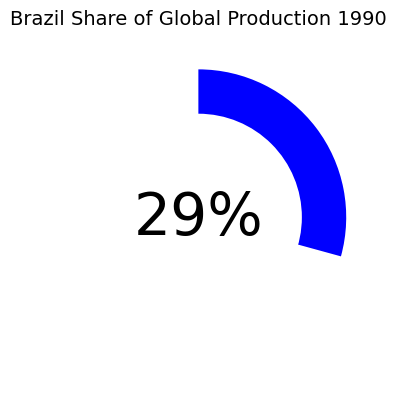

In [21]:
# creating donut chart
fig, ax = plt.subplots()

ax.pie(brazil_vs_others.iloc[0][::-1],
      startangle = 90,
      colors = ['white','blue'],
      pctdistance = .85) # push the percentage value towards the border
hole = plt.Circle((0,0), 0.7, fc='white') # creating inner white circle
fig = plt.gcf() #get the current figure
fig.gca().add_artist(hole) # adding the inner circle on top of our pie chart to display as donut chart

# let's display the percentage of Brazil's production as text on the center 
plt.text(0,
        0,
        f"{round(pct_brazil_1990[0])}%",
        ha='center', 
        va='center', 
        fontsize=42)

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

In [22]:
# calculate pct share of brazil in 2022
pct_brazil_2022 = round(brazil_vs_others.loc['2022', 'Brazil']/ brazil_vs_others.loc['2022'].sum(axis=1)*100)
pct_brazil_2022[0]

37.0

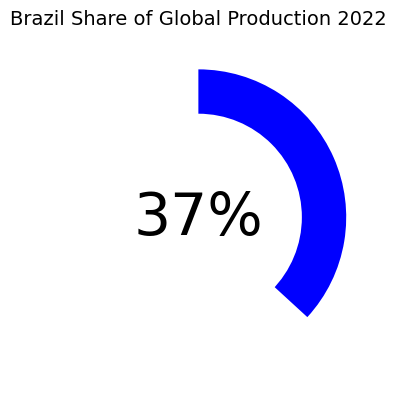

In [23]:
# donut chart for 2022
fig, ax = plt.subplots()
ax.pie(brazil_vs_others.iloc[-1][::-1],
      startangle = 90,
      colors = ['white', 'blue'])

hole =plt.Circle((0,0), .7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(0,0,
        f"{round(pct_brazil_2022[0])}%",
        ha = 'center',
        va = 'center',
        fontsize = 42)
ax.set_title("Brazil Share of Global Production 2022", fontsize=14)
plt.show()

## Single Figure Report on Brazil's Place in Global Coffee Market and output the same as an image

In [24]:
# I'm using matplotlib GridSpec method to create a dashboard layout and push all the above findings into each section
# Two donut charts representing Brazil's production share in 1990 and 2022 in the top third.
# The stackplot comparing Brazil to the rest of the world in the center.
# Production over years of top 5 countries at the bottom first half and pie chart showing share of global coffee production on the bottom 2nd half
# Save the report out as an image.

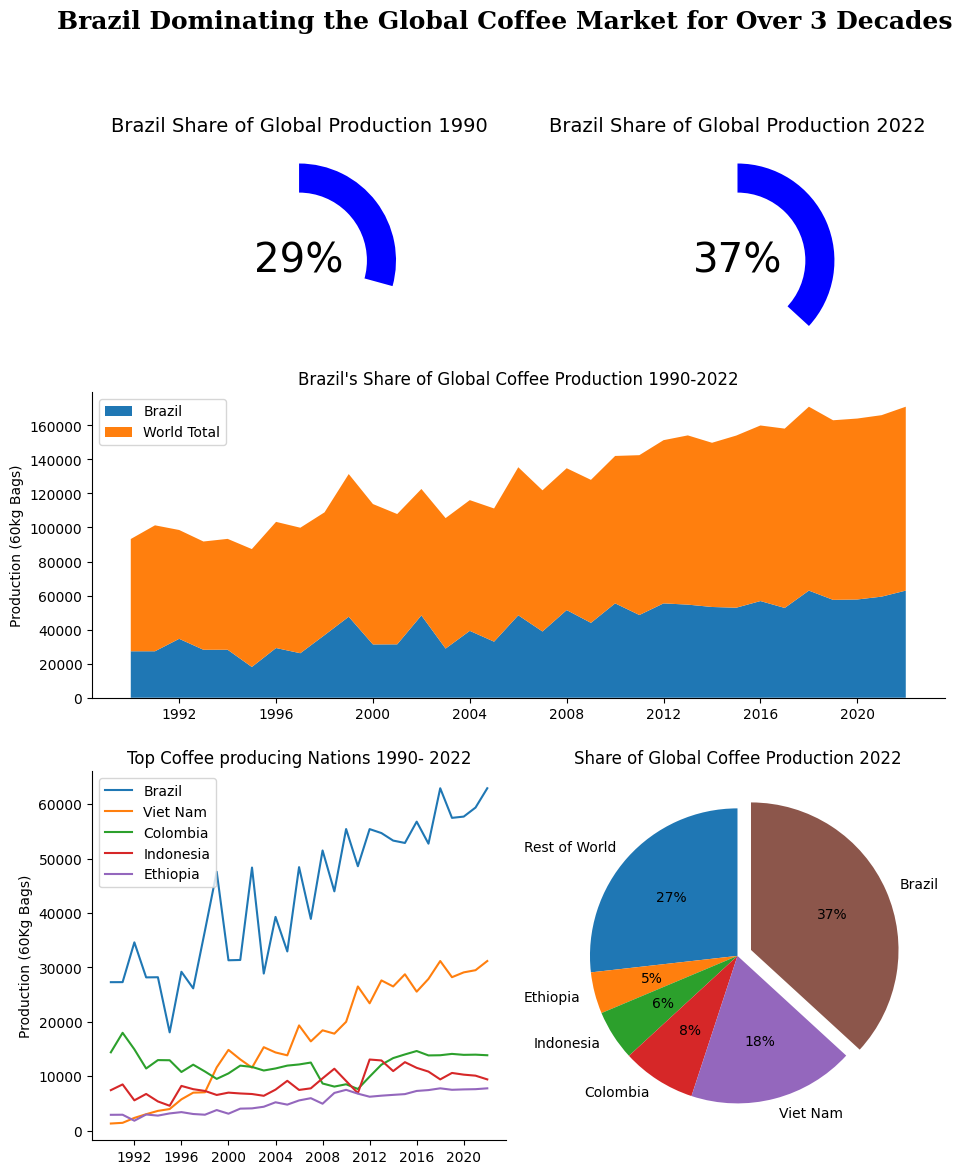

In [25]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=((11, 13)))
gs = GridSpec(16, 6)
fig.suptitle("Brazil Dominating the Global Coffee Market for Over 3 Decades", 
            fontsize=18, 
            fontweight="bold",
            fontfamily='serif')

# pie for brazil 1990
ax1 = fig.add_subplot(gs[:4, :3])
ax1.pie(brazil_vs_others.iloc[0][::-1],
      startangle = 90,
      colors = ['white','blue'],
      pctdistance = .85) # push the percentage value towards the border
hole = plt.Circle((0,0), 0.7, fc='white') # creating inner white circle
fig = plt.gcf() # get the current figure
fig.gca().add_artist(hole) # get the current axes and adding the inner circle on top of our pie chart to display as donut chart

# let's display the percentage of Brazil's production as text on the center 
plt.text(0,
        0,
        f"{round(pct_brazil_1990[0])}%",
        ha='center', 
        va='center', 
        fontsize=29)

ax1.set_title("Brazil Share of Global Production 1990", fontsize=14)

# pie for brazil 2022
ax2 = fig.add_subplot(gs[:4, 3:])
ax2.pie(brazil_vs_others.iloc[-1][::-1],
      startangle = 90,
      colors = ['white', 'blue'])

hole =plt.Circle((0,0), .7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(0,0,
        f"{round(pct_brazil_2022[0])}%",
        ha = 'center',
        va = 'center',
        fontsize = 29)
ax2.set_title("Brazil Share of Global Production 2022", fontsize=14)

# stacked area chart comparing Brazil to the rest of the world
ax3 = fig.add_subplot(gs[4:9, :])
ax3.stackplot(
       brazil_vs_others.index,
       brazil_vs_others['Brazil'],
       brazil_vs_others['rest_of_world'],
       labels = ['Brazil', 'World Total']
       )
ax3.set_title("Brazil's Share of Global Coffee Production 1990-2022")
ax3.set_ylabel("Production (60kg Bags)", fontsize=10)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax3.legend(loc="upper left");

# Production over years of top 5 countries
ax4 = fig.add_subplot(gs[10:, :3])
ax4.plot(top5.index, top5['Brazil'], label = "Brazil")
ax4.plot(top5.index, top5['Viet Nam'], label = "Viet Nam")
ax4.plot(top5.index, top5['Colombia'], label = "Colombia")
ax4.plot(top5.index, top5['Indonesia'], label = "Indonesia")
ax4.plot(top5.index, top5['Ethiopia'], label = "Ethiopia")

ax4.set_ylabel("Production (60Kg Bags)")

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.legend()
ax4.set_title('Top Coffee producing Nations 1990- 2022')

# pie chart showing share of global coffee production
ax5 = fig.add_subplot(gs[10:, 3:])
ax5.pie(coffee_production_2022.iloc[0][::-1], # slicing trick to reverse the order of values (here desc to ascen)
       autopct="%.0f%%",
     labels=list(coffee_production_2022.columns[::-1]),
       startangle=90,
        explode = (0, 0, 0, 0, 0, 0.1)
      )

ax5.set_title("Share of Global Coffee Production 2022"); 

fig.savefig('brazil_production_stats.png', bbox_inches='tight', facecolor="white")